In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow as tf
from pylab import rcParams
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [3]:
X , y = make_circles(n_samples=100, noise = 0.1, random_state = 1)

<Axes: >

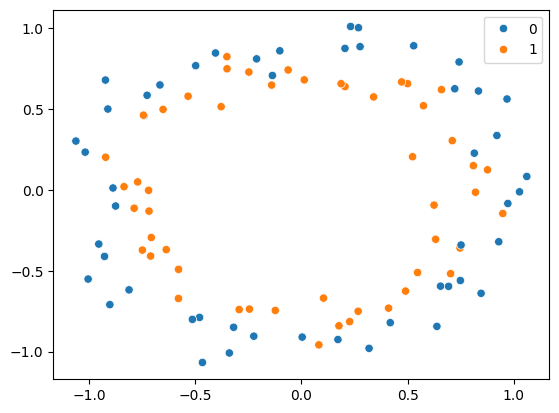

In [9]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

model = Sequential()
model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 2000, verbose= 0)

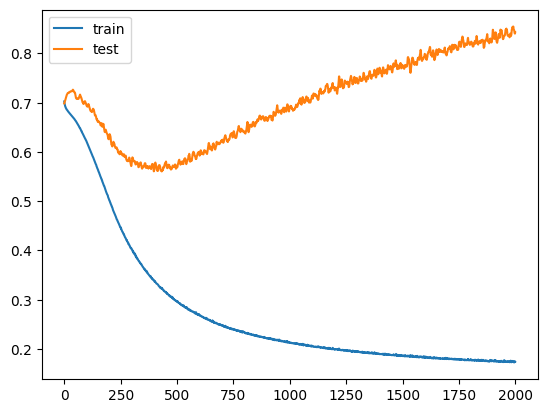

In [13]:
plt.plot(history.history['loss'], label ='train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


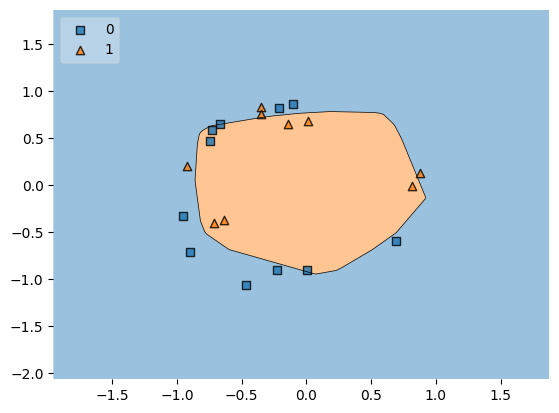

In [14]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# **Early Stopping**

<Axes: >

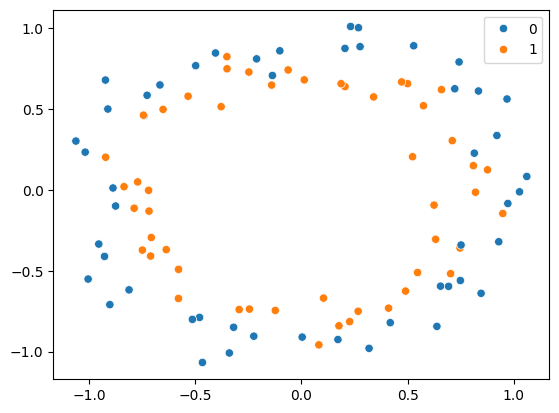

In [39]:
X , y = make_circles(n_samples=100, noise = 0.1, random_state = 1)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

model = Sequential()
model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
callback = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.00001,
    patience = 100,
    verbose = 1,
    mode = 'auto',
    baseline=None,
    restore_best_weights=False
)

In [43]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 2000, callbacks=callback)

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.5063 - loss: 0.6940 - val_accuracy: 0.4500 - val_loss: 0.6956
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4672 - loss: 0.6935 - val_accuracy: 0.4000 - val_loss: 0.6981
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5594 - loss: 0.6891 - val_accuracy: 0.4000 - val_loss: 0.6993
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5672 - loss: 0.6878 - val_accuracy: 0.4000 - val_loss: 0.7015
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5289 - loss: 0.6890 - val_accuracy: 0.5000 - val_loss: 0.7034
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6039 - loss: 0.6861 - val_accuracy: 0.5000 - val_loss: 0.7038
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6039 - loss: 0.6833 - val_accuracy: 0.5000 - val_loss: 0.7046
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5883 - loss: 0.6837 - val_accuracy: 0.5000 - v

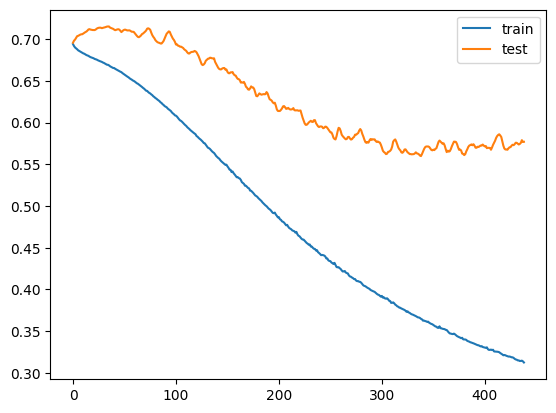

In [44]:
plt.plot(history.history['loss'], label ='train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()